In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import collections 
import seaborn as sns
import datetime
from tqdm import tqdm

In [2]:
ABC_Hour_df = pd.read_csv('ABC_Tick_Data/ABC_Level_One_Tick_Data.csv')
ABC_Minute_df = pd.read_csv('ABC_Tick_Data/ABC_Level_Two_Tick_Data.csv')

### Data Exploratory ### 
Combine 2 datasets, Check the validiity of Time_Hour, MinTimeHour and MaxTimeHour fields in L1 dataset, by comparing the trend of average price by hour in L1 and L2 dataset. 

Average prices: TWAP in L1 as price-L1, and all bid ask levels prices in L2 as price-L2.

Datetime: Time_Hour field across both datasets

Conclusion: The price trends in both datasets are roughly the same when using Time_Hour, we will disregard MinTimeHour and MaxTimeHour field and assume the data for L1 and L2 are from the same period and can be used in conjunction. 

In [3]:
ABC_Hour_df['Date'] = ABC_Hour_df['Time_Hour'].astype('datetime64[ns]').dt.date
ABC_Hour_df['Hour'] = ABC_Hour_df['Time_Hour'].astype('datetime64[ns]').dt.hour
ABC_Hour_df['Time_Hour_clean'] = pd.to_datetime(ABC_Hour_df['Time_Hour'].apply(lambda x:x[:16]), format='%Y-%m-%d %H:%M')
ABC_Hour_df = ABC_Hour_df.drop(columns=['Time_Hour'])

In [4]:
ABC_Minute_df['Date'] =  pd.to_datetime(ABC_Minute_df['Time_Minute'], format='%d/%m/%Y %H:%M').dt.date
ABC_Minute_df['Hour'] = pd.to_datetime(ABC_Minute_df['Time_Minute'], format='%d/%m/%Y %H:%M').dt.hour

In [5]:
ABC_full_df = ABC_Minute_df.merge(ABC_Hour_df, how='inner', on=['Date','Hour'])

In [6]:
ABC_Time_minute_avg_price = ABC_full_df.filter(regex='Price|Time_Hour').groupby('Time_Hour_clean').mean().mean(axis=1)

In [7]:
ABC_Time_minute_avg_price

Time_Hour_clean
2018-02-05 08:00:00    50.243342
2018-02-05 09:00:00    50.246712
2018-02-05 10:00:00    50.238217
2018-02-05 11:00:00    50.251074
2018-02-05 12:00:00    50.175091
                         ...    
2018-06-12 11:00:00    37.129214
2018-06-12 12:00:00    36.948720
2018-06-12 13:00:00    36.856655
2018-06-12 14:00:00    36.775643
2018-06-12 15:00:00    36.920476
Length: 806, dtype: float64

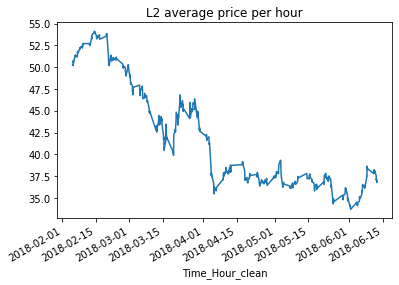

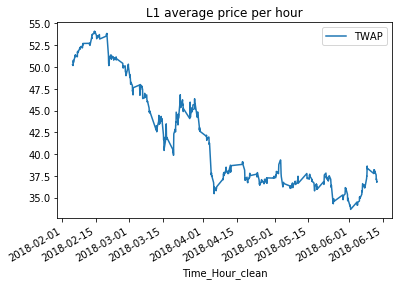

In [8]:
ABC_Time_minute_avg_price.plot(title = 'L2 average price per hour'), 
ABC_full_df.plot(x='Time_Hour_clean',y='TWAP', title='L1 average price per hour')

#### Let's look at the relationship of volume and bid-ask prices over levels given a certain period, and how that impact on overall prices and volume

In [9]:
ABC_full_df.describe()

,L1_BidSize,L2_BidSize,L3_BidSize,L4_BidSize,L5_BidSize,L6_BidSize,L7_BidSize,L8_BidSize,L9_BidSize,L10_BidSize,...,Open,High,Low,Close,VWAP,TWAP,NumberOfTrades,Volume,Turnover,Avg_Bid_Ask_Spread
count,4.605500e+04,4.605500e+04,4.605500e+04,4.605500e+04,4.605500e+04,4.605500e+04,4.605500e+04,4.605500e+04,4.605500e+04,4.605500e+04,...,46081.000000,46081.000000,46081.000000,46081.000000,46081.000000,46081.000000,46081.000000,4.608100e+04,4.608100e+04,46081.000000
mean,8.475385e+05,5.765847e+05,7.115665e+05,7.609992e+05,8.063159e+05,8.107078e+05,8.005477e+05,7.860610e+05,7.533989e+05,7.257889e+05,...,41.987586,42.250847,41.724764,41.987134,42.001132,41.984926,4123.271630,4.284712e+05,2.190476e+09,-0.013609
std,7.716308e+06,8.532469e+05,9.280190e+05,8.633887e+05,9.528125e+05,1.599664e+06,1.069490e+06,1.254609e+06,1.066012e+06,1.373922e+06,...,6.138369,6.216166,6.257590,6.138252,6.153914,6.135842,3394.705867,4.936808e+05,2.627731e+09,0.083197
min,2.727273e-01,1.363636e+00,4.545455e-01,1.818182e-01,1.818182e-01,9.090909e-02,9.090909e-02,9.090909e-01,9.090909e-02,9.090909e-02,...,33.636364,33.785909,6.339418,33.631818,33.647405,33.658734,1.000000,4.454545e+00,2.695991e+04,-0.945191
25%,1.407396e+05,2.282371e+05,2.853916e+05,2.994750e+05,3.105594e+05,3.071205e+05,3.019409e+05,2.848716e+05,2.635420e+05,2.441673e+05,...,36.868182,37.059091,36.745455,36.863636,36.887775,36.899492,1866.000000,1.421665e+05,7.072033e+08,0.003309
50%,2.415091e+05,3.924136e+05,4.958845e+05,5.206532e+05,5.417151e+05,5.349221e+05,5.286081e+05,5.093593e+05,4.833041e+05,4.595708e+05,...,38.722727,38.909091,38.339886,38.772727,38.741178,38.695360,3042.000000,2.494396e+05,1.238694e+09,0.008854
75%,4.186258e+05,6.943769e+05,8.609352e+05,9.169734e+05,9.593738e+05,9.596787e+05,9.536278e+05,9.331450e+05,8.990186e+05,8.610042e+05,...,46.945455,47.272727,46.500000,46.863636,46.863055,46.805946,5054.000000,4.917332e+05,2.540139e+09,0.011062
max,5.049896e+08,6.449881e+07,6.334613e+07,2.525923e+07,3.702433e+07,2.577245e+08,6.823583e+07,1.219940e+08,8.127682e+07,1.925105e+08,...,54.136364,67.363636,54.009091,54.127273,56.555639,54.097435,24857.000000,4.424551e+06,2.483121e+10,1.941967


In [10]:
ABC_full_df.filter(regex='Price').describe()

,L1_BidPrice,L2_BidPrice,L3_BidPrice,L4_BidPrice,L5_BidPrice,L6_BidPrice,L7_BidPrice,L8_BidPrice,L9_BidPrice,L10_BidPrice,L1_AskPrice,L2_AskPrice,L3_AskPrice,L4_AskPrice,L5_AskPrice,L6_AskPrice,L7_AskPrice,L8_AskPrice,L9_AskPrice,L10_AskPrice
count,46055.000000,46055.000000,46055.000000,46055.000000,46055.000000,46055.000000,46055.000000,46055.000000,46055.000000,46055.000000,46055.000000,46055.000000,46055.000000,46055.000000,46055.000000,46055.000000,46055.000000,46055.000000,46055.000000,46055.000000
mean,42.036061,42.006814,41.995613,41.985616,41.976794,41.967885,41.960035,41.952530,41.945604,41.938013,41.928706,41.959115,41.972097,41.982476,41.991593,42.000018,42.007951,42.015984,42.023493,42.031296
std,6.161684,6.145863,6.140720,6.137234,6.134332,6.131255,6.128295,6.126119,6.123851,6.121738,6.159033,6.145777,6.145412,6.145929,6.146530,6.148144,6.149643,6.150809,6.152660,6.154099
min,33.609258,33.602697,33.597730,33.275238,31.308839,33.545455,33.540909,28.584813,33.220740,31.657843,6.485309,30.245455,30.918182,31.927273,31.931818,31.936364,31.968182,32.354545,32.431818,32.450000
25%,36.897868,36.890518,36.885564,36.880393,36.875124,36.869637,36.865026,36.860073,36.854495,36.850130,36.875588,36.882864,36.890866,36.896747,36.902023,36.906926,36.912348,36.918015,36.922582,36.927803
50%,38.805920,38.776540,38.767333,38.752904,38.743036,38.733431,38.728733,38.722811,38.716308,38.706668,38.670636,38.705226,38.722069,38.729435,38.738024,38.743518,38.748874,38.754225,38.758512,38.764147
75%,46.921275,46.885763,46.872888,46.862765,46.853776,46.839725,46.829053,46.818745,46.804881,46.794741,46.818043,46.844463,46.856376,46.873808,46.881951,46.893344,46.906413,46.915191,46.925392,46.935052
max,58.150731,57.854545,57.727273,56.563636,56.527273,56.518182,56.409091,56.400000,56.381818,56.372727,54.192014,54.202194,54.208129,54.214920,54.225176,54.235215,54.247117,54.254534,54.258297,54.578444


In [11]:
ABC_full_df.Low.describe()

count    46081.000000
mean        41.724764
std          6.257590
min          6.339418
25%         36.745455
50%         38.339886
75%         46.500000
max         54.009091
Name: Low, dtype: float64

In [12]:
ABC_Hour_df[ABC_Hour_df.Low<10]

,Instrument_Code,Open,High,Low,Close,VWAP,TWAP,NumberOfTrades,Volume,Turnover,MinTimeHour,MaxTimeHour,Avg_Bid_Ask_Spread,Date,Hour,Time_Hour_clean
470,ABC,42.686364,42.75,6.339418,42.354545,39.444264,42.380262,6326,581266.9091,2.980743e+09,2020-03-13 10:00:00.375782+00:00,2020-03-13 10:59:50.533051+00:00,0.012727,2018-03-16,10,2018-03-16 10:00:00


In [13]:
ABC_Minute_df.filter(regex='L1')[ABC_Minute_df.L1_AskPrice<10]

,L1_BidSize,L10_BidSize,L1_AskSize,L10_AskSize,L1_BidPrice,L10_BidPrice,L1_AskPrice,L10_AskPrice
30662,136211219.4,3318481.909,62852996.73,3242731.0,40.127569,37.844245,6.485309,36.773289


In [14]:
ABC_time_minute_tot_volume = ABC_full_df.filter(regex='Size|Time_Hour').groupby('Time_Hour_clean').sum().sum(axis=1)

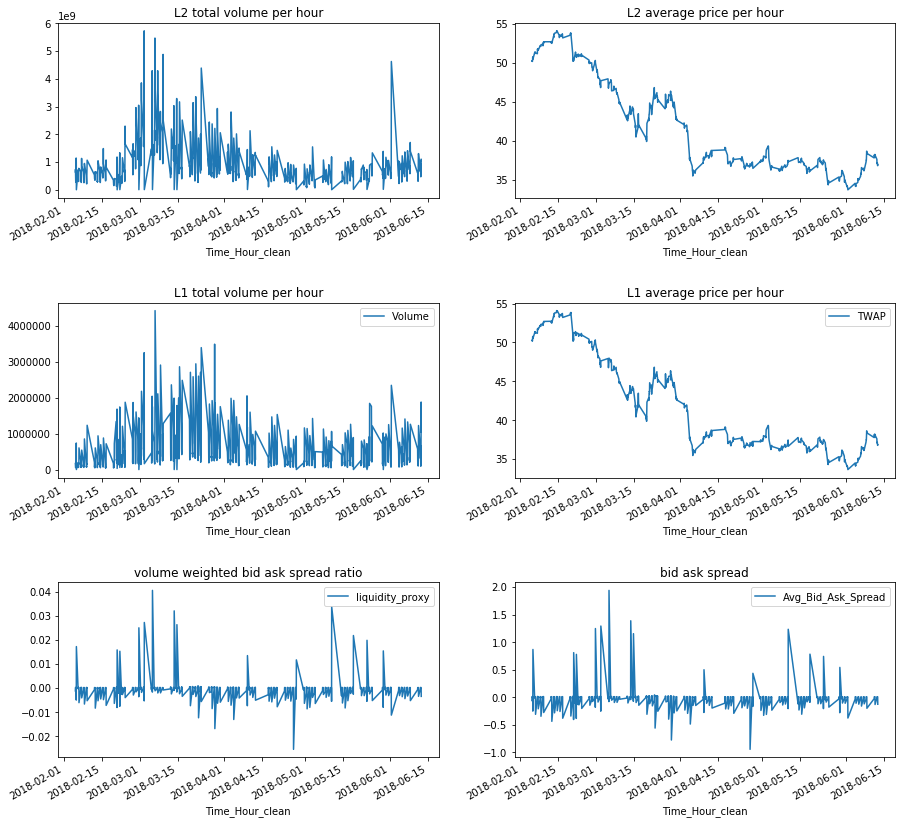

In [16]:
ABC_full_df['liquidity_proxy'] = ABC_full_df.Avg_Bid_Ask_Spread/ABC_full_df.VWAP
fig, axs = plt.subplots(3, 2, figsize=(15,15))
plt.subplots_adjust(hspace = 0.6)
ABC_time_minute_tot_volume.plot(title = 'L2 total volume per hour',ax=axs[0,0]), 
ABC_full_df.plot(x='Time_Hour_clean',y='Volume', title='L1 total volume per hour', ax=axs[1,0]),
ABC_Time_minute_avg_price.plot(title = 'L2 average price per hour',ax=axs[0,1]), 
ABC_full_df.plot(x='Time_Hour_clean',y='TWAP', title='L1 average price per hour', ax=axs[1,1]),
ABC_full_df.plot(x='Time_Hour_clean', y='liquidity_proxy', title='volume weighted bid ask spread ratio',ax=axs[2,0])
ABC_full_df.plot(x='Time_Hour_clean', y='Avg_Bid_Ask_Spread', title='bid ask spread',ax=axs[2,1])

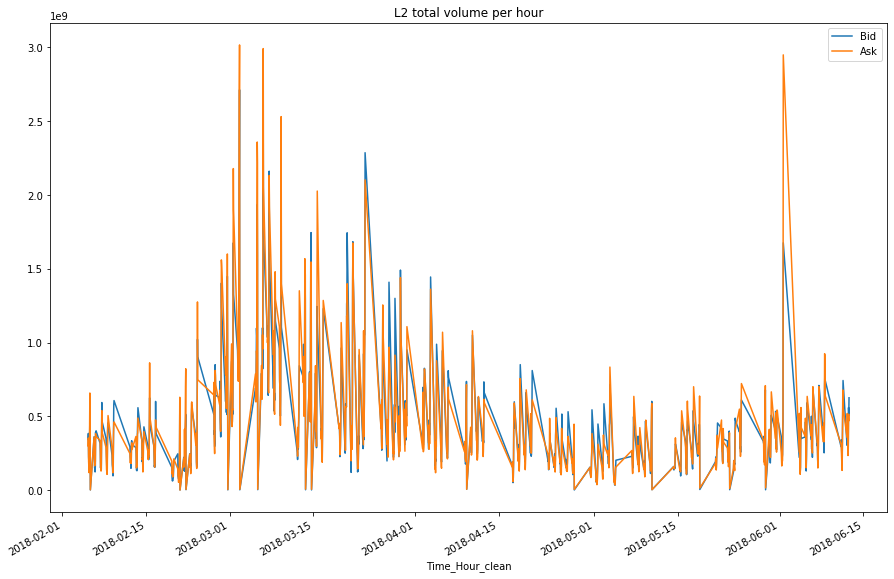

In [17]:
# fig, axs = plt.subplots(3, 2, figsize=(15,15))
# plt.subplots_adjust(hspace = 0.6)
plt.figure(figsize=(15,10))
ABC_time_minute_tot_volume_bid = ABC_full_df.filter(regex='BidSize|Time_Hour').groupby('Time_Hour_clean').sum().sum(axis=1)
ABC_time_minute_tot_volume_ask = ABC_full_df.filter(regex='AskSize|Time_Hour').groupby('Time_Hour_clean').sum().sum(axis=1)
ax = ABC_time_minute_tot_volume_bid.plot(title = 'L2 total volume per hour', label='Bid') 
ABC_time_minute_tot_volume_ask.plot(ax=ax, label='Ask')
ax.legend()

In [18]:
#### Match bid/ask size with actual volume of transaction
ABC_timeminute_tot_volume_bidlevel = ABC_full_df.filter(regex='BidSize|Time_Hour').groupby('Time_Hour_clean').sum()
ABC_timeminute_tot_volume_asklevel = ABC_full_df.filter(regex='AskSize|Time_Hour').groupby('Time_Hour_clean').sum()

In [20]:
ABC_timeminute_price_bidlevel = ABC_full_df.filter(regex='BidPrice|Time_Hour').groupby('Time_Hour_clean').mean()
ABC_timeminute_price_asklevel = ABC_full_df.filter(regex='AskPrice|Time_Hour').groupby('Time_Hour_clean').mean()

In [21]:
ABC_full_df['Level1_Spread_Perc'] = (ABC_full_df['L1_AskPrice'] - ABC_full_df['L1_BidPrice']) / ABC_full_df['L1_AskPrice']
ABC_full_df['Level1_Spread'] = ABC_full_df['L1_AskPrice'] - ABC_full_df['L1_BidPrice']
ABC_full_df['Level1_Spread_weighted'] = (ABC_full_df['L1_AskPrice']* ABC_full_df['L1_AskSize']- ABC_full_df['L1_BidPrice']*ABC_full_df['L1_BidSize'])/(ABC_full_df['L1_BidSize']+ABC_full_df['L1_AskSize'])


<Figure size 1800x1440 with 0 Axes>

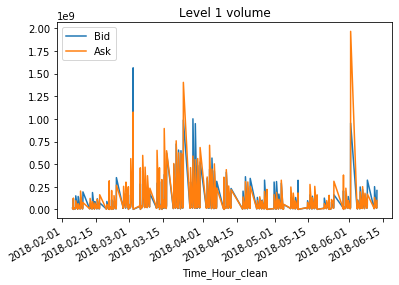

In [22]:
plt.figure(figsize=(25,20))
# fig, axs = plt.subplots(2, 1, figsize=(15,15))
# plt.subplots_adjust(hspace = 0.6)

ax = ABC_timeminute_tot_volume_bidlevel.plot(y='L1_BidSize', title = 'Level 1 volume', label='Bid') 
ABC_timeminute_tot_volume_asklevel.plot(ax=ax, y='L1_AskSize', label='Ask')
ax.legend()


In [24]:
ABC_full_df[['Level1_Spread','Time_Hour_clean']].groupby('Time_Hour_clean').mean().describe()

,Level1_Spread
count,806.000000
mean,-0.128693
std,0.410064
min,-4.362331
25%,0.007852
50%,0.009563
75%,0.013357
max,0.748325


### Train  model ###

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn. linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

/usr/local/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [40]:
Feature_scaled = pd.read_csv('output_data/fe_output_train.csv')

In [41]:
Feature_scaled = Feature_scaled.set_index('Unnamed: 0')
Feature_scaled.index = Feature_scaled.index.rename('Time_Interval')

In [43]:
X = Feature_scaled.drop(columns=['Selling_Cost_Label','Slippage'])
y = Feature_scaled[['Selling_Cost_Label']]
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.25, random_state = 42)

In [45]:
Feature_scaled.corr()

,Vol,L1_BidSize_15min,tot_BidSize_15min,L1_AskSize_15min,tot_AskSize_15min,L1_BidSize_perc_15min,L1_Asksize_perc_15min,Normalised_Order_Book_Imbalance_15min,Level1_Spread_15min,Level1_Spread_Perc_15min,...,tot_BidSize_120h,L1_AskSize_120h,tot_AskSize_120h,L1_BidSize_perc_120h,L1_Asksize_perc_120h,Normalised_Order_Book_Imbalance_120h,Level1_Spread_120h,Level1_Spread_Perc_120h,Selling_Cost_Label,Slippage
Vol,1.000000e+00,4.373926e-20,-8.627192e-19,2.741245e-19,1.643993e-19,1.809900e-19,-1.960725e-20,1.568580e-19,-9.728214e-20,-5.467407e-19,...,-1.213387e-18,-1.002986e-18,-4.223101e-19,5.444783e-19,-3.699956e-19,9.999699e-19,-1.455462e-19,2.809116e-19,-0.000268,0.096913
L1_BidSize_15min,4.373926e-20,1.000000e+00,6.382505e-01,9.100950e-01,5.906256e-01,7.214574e-01,7.272153e-01,-3.094348e-02,-8.013936e-01,-7.444506e-01,...,1.159443e-01,1.590665e-01,1.118766e-01,3.859622e-02,3.616000e-02,-7.836042e-03,-8.513900e-02,-4.767028e-02,0.047375,0.075247
tot_BidSize_15min,-8.627192e-19,6.382505e-01,1.000000e+00,6.128467e-01,9.464799e-01,3.284087e-01,3.517312e-01,-4.583095e-02,-4.472970e-01,-4.109868e-01,...,5.118497e-01,4.133913e-01,5.177316e-01,-1.876029e-01,-1.151026e-01,-1.063748e-01,-1.198858e-01,6.032122e-02,0.195589,-0.015035
L1_AskSize_15min,2.741245e-19,9.100950e-01,6.128467e-01,1.000000e+00,6.486727e-01,6.612518e-01,6.890579e-01,-5.520046e-02,-7.143837e-01,-6.507498e-01,...,1.225394e-01,1.599345e-01,1.196917e-01,1.484667e-02,2.408783e-02,-1.271547e-02,-6.197882e-02,-2.246203e-02,0.044525,0.053377
tot_AskSize_15min,1.643993e-19,5.906256e-01,9.464799e-01,6.486727e-01,1.000000e+00,3.204356e-01,3.251448e-01,-1.896041e-01,-4.046812e-01,-3.654528e-01,...,4.972391e-01,3.864961e-01,5.087270e-01,-2.118181e-01,-1.305447e-01,-1.453444e-01,-8.139491e-02,9.879782e-02,0.207203,-0.020673
L1_BidSize_perc_15min,1.809900e-19,7.214574e-01,3.284087e-01,6.612518e-01,3.204356e-01,1.000000e+00,8.706703e-01,-2.340934e-02,-8.824964e-01,-8.180782e-01,...,-2.549143e-03,4.104595e-02,-7.690526e-03,9.144550e-02,6.965067e-02,9.200530e-03,-4.436186e-02,-6.528420e-02,-0.012665,0.176243
L1_Asksize_perc_15min,-1.960725e-20,7.272153e-01,3.517312e-01,6.890579e-01,3.251448e-01,8.706703e-01,1.000000e+00,2.036273e-02,-9.062367e-01,-8.426876e-01,...,-2.048927e-02,2.736450e-02,-2.661038e-02,9.650296e-02,9.521105e-02,1.218415e-02,-6.345311e-02,-6.521449e-02,0.003169,0.161019
Normalised_Order_Book_Imbalance_15min,1.568580e-19,-3.094348e-02,-4.583095e-02,-5.520046e-02,-1.896041e-01,-2.340934e-02,2.036273e-02,1.000000e+00,1.713255e-02,2.476780e-03,...,-1.755492e-02,1.438524e-02,-3.202850e-02,1.204906e-01,9.864055e-02,2.547132e-01,-9.807054e-02,-1.732322e-01,-0.198003,-0.049813
Level1_Spread_15min,-9.728214e-20,-8.013936e-01,-4.472970e-01,-7.143837e-01,-4.046812e-01,-8.824964e-01,-9.062367e-01,1.713255e-02,1.000000e+00,9.375802e-01,...,-2.795999e-02,-5.617763e-02,-2.492408e-02,-3.576654e-02,-2.935382e-02,1.021836e-02,5.930266e-02,3.519910e-02,-0.042836,-0.119412
Level1_Spread_Perc_15min,-5.467407e-19,-7.444506e-01,-4.109868e-01,-6.507498e-01,-3.654528e-01,-8.180782e-01,-8.426876e-01,2.476780e-03,9.375802e-01,1.000000e+00,...,-1.729235e-02,-4.340836e-02,-1.388467e-02,-4.030018e-02,-3.110767e-02,-4.081023e-03,5.084657e-02,4.803762e-02,-0.016561,-0.120109


#### Feature Importance checkpoint ####

In [46]:
linreg = LinearRegression()
 
rforest = RandomForestRegressor(n_estimators=50, max_depth=100, random_state=42)
 
gboost = GradientBoostingRegressor(random_state=42, n_estimators=50, max_depth=100)
 
adaboost = AdaBoostRegressor(random_state=42)
    
svr_lin = LinearSVR(C=1.0,  max_iter=10, random_state=42)
 
#svr_rbf = SVR(C=1, kernel='rbf', max_iter=10)
 
 
 
def get_feature_importance(fit_regressor, regressor_name, feature_names):
 
    # For trees-based methods feature importance is total reduction of the criterion (Gini by default/Entropy available)
    # brought by that feature. It is called 'Gini importance'.
    if (regressor_name == 'rforest')|(regressor_name == 'gboost')|(regressor_name == 'adaboost'):        
        importances = fit_regressor.feature_importances_.tolist()
        importances = [round(i, 4) for i in importances] #round importance figures to 4 decimal place
        importance_list = list(zip(feature_names, importances))
        print('success:{}'.format(regressor_name))
#         print('Gini importance of features: ', importance_list)
       
    
    # For a general kernel it is difficult to interpret the SVM weights, but for the linear SVM:
    # - In linear SVM, the result is a hyperplane that separates the classes as best as possible.
    # - coefs define the vector which is orthogonal to the hyperplane, i.e. weights of the features
    # - if the dot product of any point with the vector is positive, it belongs to the positive class, o/w - negative
    elif (regressor_name == 'svr_lin')|(regressor_name == 'linreg'):
        if regressor_name=='svr_lin':
            coefs = fit_regressor.coef_.tolist()
        else:
            coefs = fit_regressor.coef_[0].tolist()
        coefs = [round(i, 4) for i in coefs]
        importance_list = list(zip(feature_names, coefs))
        print('success:{}'.format(regressor_name))
       
       
    else:
        importance_list = None
        print('Importance not available for this method.')
       
    return importance_list

In [47]:
#Top 10
regressor_name = ['rforest'] ##,'svr_lin','adaboost'] 
regressors = [rforest] ## ,gboost,svr_lin,adaboost]
feature_names = X_train.columns
results = []

for n,c in enumerate(regressors):
    importance_list = get_feature_importance(c.fit(X_train,y_train), regressor_name[n], feature_names)
    dict_={regressor_name[n]:importance_list}
    results.append(dict_)


sorted_re=[]
for regressor in results:
    for k, v in regressor.items():
        if regressor[k] is not None:
            sorted_={k:sorted(regressor[k], key=lambda tup: abs(tup[1]),reverse=True)}            
            sorted_re.append(sorted_)

labels=['factor']
for i in sorted_re:
    labels.extend([k for k, v in i.items()])

    
df_importance=[]
for n,i in enumerate(sorted_re):
    df=pd.DataFrame.from_records(i[labels[n+1]], columns=list([labels[0],labels[n+1]]))
    df_importance.append(df)  

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


success:rforest


In [52]:
df_importance[0][:10]

,factor,rforest
0,Level1_Spread_1h,0.5648
1,L1_BidSize_120h,0.1401
2,tot_BidSize_24h,0.0711
3,Level1_Spread_Perc_120h,0.0658
4,L1_BidSize_perc_120h,0.0400
5,Normalised_Order_Book_Imbalance_120h,0.0321
6,tot_AskSize_120h,0.0194
7,L1_Asksize_perc_120h,0.0168
8,tot_BidSize_120h,0.0119
9,L1_AskSize_120h,0.0112


In [53]:
def find_best_reg_param(X, y, regressor_name, scoring, cv):
    
    # AdaBoost
    try:
        if regressor_name == "LinearSVR":
            param_grid=[{
                'loss':['epsilon_insensitive', 'squared_epsilon_insensitive'], 'C':[1,0.1, 0.01], 'random_state':[42]}
            ]
            svr=LinearSVR()
            gs = GridSearchCV(svr, param_grid, scoring=scoring, cv=cv)
            gs.fit(X, y)
            regressor=gs.best_estimator_
            print(regressor_name, regressor)
            
        if regressor_name == "LR":
            lr=LinearRegression()
#             gs = GridSearchCV(adaboost, param_grid, scoring=scoring, cv=cv)
            lr.fit(X, y)
            regressor=lr
            print(regressor_name, regressor)
            
        if regressor_name == "AB":
            param_grid=[{
                'n_estimators':[100, 50, 25], 'learning_rate':[1,0.1, 0.01], 'loss':['linear','square'], 'random_state':[42]}
            ]
            adaboost=AdaBoostRegressor()
            gs = GridSearchCV(adaboost, param_grid, scoring=scoring, cv=cv)
            gs.fit(X, y)
            regressor=gs.best_estimator_
            print(regressor_name, regressor)

        #RF
        if regressor_name == "RF":
            param_grid=[
                {'n_estimators':[100, 50, 25], 'max_depth':[50, 100, 150], 'max_features':[2, 3, 4], 'random_state':[42]}
            ]
            rforest = RandomForestRegressor()
            gs = GridSearchCV(rforest, param_grid, scoring=scoring, cv=cv)
            gs.fit(X, y)
            regressor=gs.best_estimator_
            print(regressor_name, regressor)


        # GB
        if regressor_name == "GB":
            param_grid=[{
                'n_estimators':[100, 50, 25], 'max_depth':[50, 100, 150], 'random_state':[42]}
            ]
            gboost=GradientBoostingRegressor()
            gs = GridSearchCV(gboost, param_grid, scoring=scoring, cv=cv)
            gs.fit(X, y)
            regressor=gs.best_estimator_
            print(regressor_name, regressor)
            
        regressors_dct = {regressor_name: regressor}
        return regressors_dct
    
    except:
        print("Error: No model returned, you need to choose among Adaboost, RandmoForest, GradientBoosting, Linear Regression or Linear SVR")
        regressor = None
        pass


def get_best_regressor(regressors_dct, X, y, scoring, cv):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize, random_state=101)

#     performance_scorer = make_scorer(metric) #f1_score #roc_auc_score

#     regressors_dct = {}
#     for reg in reg_list:    
#         reg_dct = find_best_reg_param(X, y, reg, param_scoring, cv)
#         regressors_dct.update(reg_dct)
        
    best_regressors = {}
    for score_name in scoring.keys():
        if 'mean' in score_name:
            best_regressor = None
            regressor_result = {}
            for reg_name, reg_instance in regressors_dct.items():
                reg_scores = cross_val_score(reg_instance, X, y, scoring=scoring[score_name], cv=cv)    
                print(reg_name, reg_scores)
                print("Average {} of CV:{}".format(score_name, np.mean(reg_scores)))
                mean_score = np.mean(reg_scores)
                regressor_result.update({reg_name:{'score':mean_score,'regressor':reg_instance}})
            print(regressor_result)
            best_regressor = min(regressor_result.items(), key = lambda regname:abs(regname[1]['score']))
            print('\n\n *** BEST MODEL FOUND for {}:'.format(score_name), best_regressor[1]['regressor'], '***')    
            best_regressors.update({score_name:best_regressor[1]['regressor']})
       
        else:
            best_score = 0
            best_regressor = None
            for reg_name, reg_instance in regressors_dct.items():
                reg_scores = cross_val_score(reg_instance, X, y, scoring=scoring[score_name], cv=cv)    
                print(reg_name, reg_scores)
                print("Average {} of CV:{}".format(score_name, np.mean(reg_scores)))
                mean_score = np.mean(reg_scores)
                if mean_score > best_score:
                    best_score = mean_score
                    best_regressor = reg_instance
            print('\n\n *** BEST MODEL FOUND for {}:'.format(score_name), best_regressor, '***')
            best_regressors.update({score_name:best_regressor})

    return best_regressors

In [ ]:
scoring = {'mean_mse':'neg_mean_squared_error', 
           'mean_mae':'neg_mean_absolute_error', 
           'ex_var':'explained_variance',
            'r2':'r2'}
param_scoring = 'neg_mean_squared_error'

In [ ]:
regressors_dct = {}
for reg in ['RF']#['LinearSVR','LR','AB','RF','GB']:    
    reg_dct = find_best_reg_param(X_train, y_train.values.ravel(),reg,'neg_mean_squared_error',3)
    regressors_dct.update(reg_dct)

In [ ]:
best_regressors = get_best_regressor(regressors_dct, X_train, y_train.values.ravel(),scoring,3)

In [ ]:
### Use the model in the test set

In [ ]:
best_regressors['mean_mse']

In [ ]:
scoring

In [57]:
import jsonpickle

In [55]:
def write_jsonpickle(dct_path, dct_data):
    try:
        with open(dct_path, 'w') as f:
            data = jsonpickle.encode(dct_data)
            f.write(data)
    except Exception as e:
        raise e
        print(f"Could not write data to {dct_path}.")

def read_jsonpickle(dct_path):
    try:
        with open(dct_path, 'r') as f:
            data = f.read()
            decoded_file = jsonpickle.decode(data)
            
    except Exception as e:
        print("Could not read data from {}:{}".format(dct_path, e))
    return decoded_file

In [ ]:
def train(model, X_train, y_train):
    
    model.fit(X_train, y_train.values.ravel())

    write_jsonpickle(os.getcwd(),best_regressor)
    
    return model
    
    
def predict(best_regressor, X_test, y_test):
    y_pred = best_regressor.predict(X_test)
    
    pred_eval =  {'mse': metrics.mean_squared_error(y_test,y_pred),
    'mae': metrics.mean_absolute_error(y_test, y_pred),
     'explained_var': metrics.explained_variance_score(y_test, y_pred),
     'r2': metrics.r2_score(y_test, y_pred)}
    
    X_test['y_pred'] = y_pred
    return X_test, pred_eval


In [ ]:
X_test_with_pred_15, pred_eval_15 = predict(regressor_rf, X_test, y_test)

In [ ]:
pred_eval_15

In [59]:
rf_reg = read_jsonpickle('project/model/best_models_v2.json')['mean_mse']

In [60]:
write_jsonpickle('project/model/best_models_rf.json',rf_reg)